In [26]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [27]:
train_data = pd.read_csv('Train_dataset.csv')
train_data = train_data.drop(['Stock Index'],axis=1)
train_data.head()

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
train_data.iloc[:,2:] = imp.fit_transform(train_data.iloc[:,2:])
train_data.head()

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,NYSE,Real Estate,700.290000,12765.84,32.38,45.35000,1208599.0,5.05,-0.43,0.0520,1.0,0.610000,9.20,156.987852
1,NYSE,Information Tech,214.520000,12765.84,33.25,170.56000,13753356.0,3.10,0.23,0.0164,1.0,0.944041,6.91,560.859622
2,NYSE,Information Tech,943.420000,12765.84,88.27,143.58000,6892003.0,7.70,0.23,0.0396,1.0,0.944843,6.09,1279.732874
3,BSE,Materials,828.130000,38182.08,73.66,151.76000,8316793.0,4.80,0.03,0.0431,74.9,1.110000,5.60,1121.787632
4,S&P 500,Real Estate,486.007102,3351.28,23.79,127.91024,3943312.0,8.06,-0.43,0.0244,1.0,1.070000,9.46,382.962534


In [43]:
x_train = train_data.iloc[:,0:-1]
y_train = train_data.iloc[:,[-1]]
print(x_train.shape)
print(y_train.shape)

(7383, 13)
(7383, 1)


In [45]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
x_train.iloc[:,2:] = sc_X.fit_transform(x_train.iloc[:,2:]) #Scaler transformation only on numerical variables not on categorical variables
y_train = sc_y.fit_transform(y_train)
print(x_train)
print(y_train)

        Index          Industry      VWAP  General Index       NAV  P/E Ratio  \
0        NYSE       Real Estate  0.771418      -0.586566 -0.864629  -1.089375   
1        NYSE  Information Tech -0.978823      -0.586566 -0.831030   1.181283   
2        NYSE  Information Tech  1.647421      -0.586566  1.293782   0.692006   
3         BSE         Materials  1.232028       0.715458  0.729560   0.840349   
4     S&P 500       Real Estate -0.000649      -1.068855 -1.196365   0.407838   
...       ...               ...       ...            ...       ...        ...   
7378      NSE        Healthcare  1.036672      -0.663187 -0.559539  -0.798856   
7379      JSE  Information Tech -1.528464       1.613994  0.957412  -0.771109   
7380      JSE         Materials -1.276180       1.613994 -1.104839   1.692866   
7381  S&P 500         Materials  0.567595      -1.068855 -0.985892  -1.207614   
7382  S&P 500  Information Tech -1.296105      -1.068855 -1.215289   0.007417   

      Volumes Traded  Inven

     Index          Industry      VWAP  General Index       NAV  P/E Ratio  \
0     NYSE       Real Estate  0.771418      -0.586566 -0.864629  -1.089375   
1     NYSE  Information Tech -0.978823      -0.586566 -0.831030   1.181283   
2     NYSE  Information Tech  1.647421      -0.586566  1.293782   0.692006   
3      BSE         Materials  1.232028       0.715458  0.729560   0.840349   
4  S&P 500       Real Estate -0.000649      -1.068855 -1.196365   0.407838   

   Volumes Traded  Inventory Turnover  Covid Impact (Beta)  Tracking Error  \
0       -1.649161           -0.240218            -1.523308        1.012299   
1        0.597209           -1.451183             0.238555       -1.656304   
2       -0.631443            1.405453             0.238555        0.082786   
3       -0.376308           -0.395470            -0.295343        0.345148   
4       -1.159460            1.629016            -1.523308       -1.056618   

   Dollar Exchange Rate  Put-Call Ratio  P/B Ratio         0  

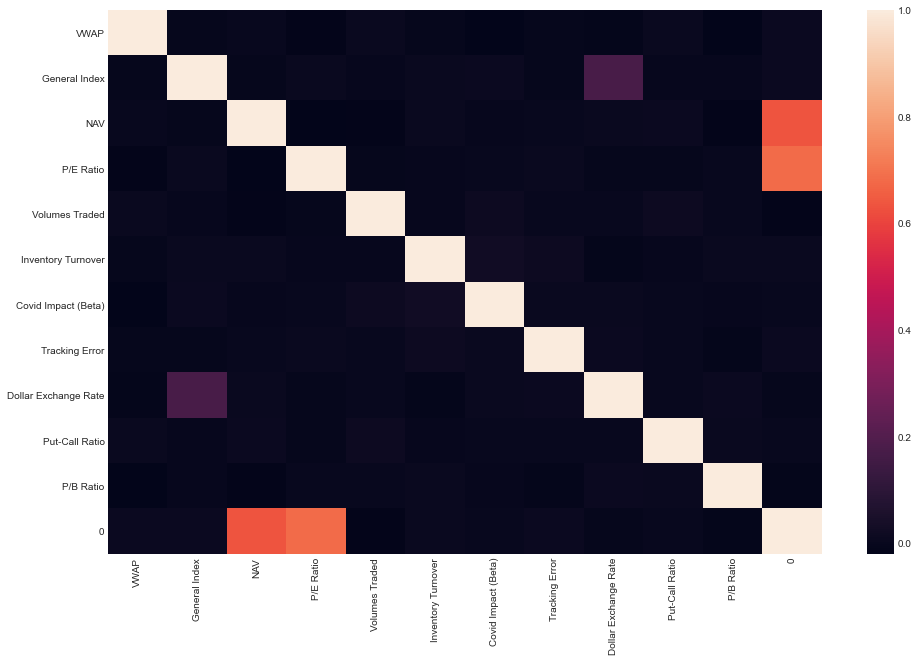

In [52]:
y_train = pd.DataFrame(y_train)
data = pd.concat([x_train,y_train],axis=1)
print(data.head())
corr = data.corr()
sns.heatmap(corr)

In [51]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False
selected_columns = data.iloc[:,2:].columns[columns]
print(selected_columns)
#data = data[selected_columns]

#Here we found that all the columns are selected.

Index([                'VWAP',        'General Index',                  'NAV',
                  'P/E Ratio',       'Volumes Traded',   'Inventory Turnover',
        'Covid Impact (Beta)',       'Tracking Error', 'Dollar Exchange Rate',
             'Put-Call Ratio',            'P/B Ratio',                      0],
      dtype='object')


In [53]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, _ = pearsonr(data['P/E Ratio'], train_data['Put-Call Ratio'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.005


In [54]:
corr, _ = pearsonr(data['Volumes Traded'], train_data['Put-Call Ratio'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.014


In [57]:
corr, _ = pearsonr(data['Volumes Traded'], train_data['P/E Ratio'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.005


In [58]:
corr, _ = pearsonr(data['Dollar Exchange Rate'], train_data['Put-Call Ratio'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.003


In [59]:
corr, _ = pearsonr(data['P/B Ratio'], train_data['Put-Call Ratio'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.007


In [61]:
corr, _ = pearsonr(data['Tracking Error'], train_data['Put-Call Ratio'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.002


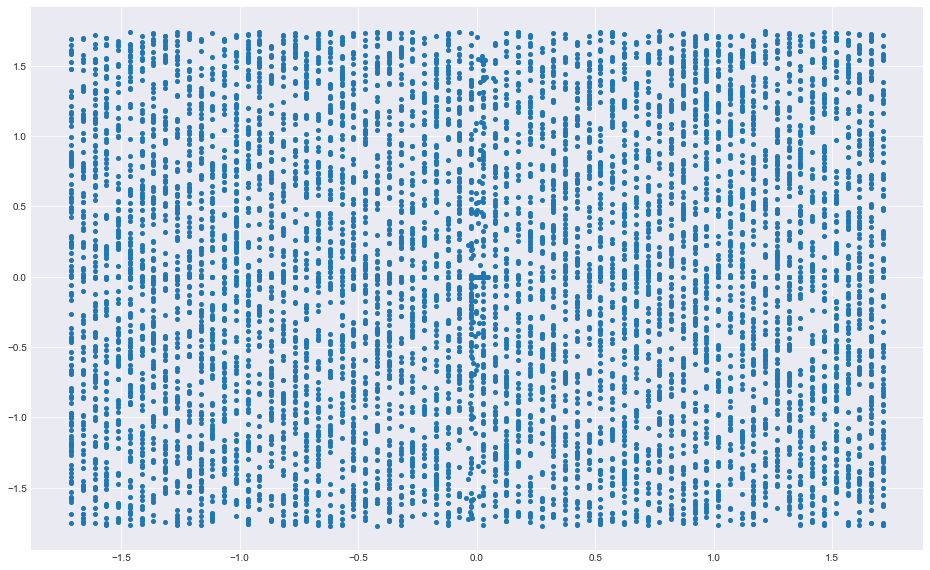

In [62]:
plt.scatter(data['Put-Call Ratio'],data['Volumes Traded'])

In [ ]:
#As we see the correlation between the feature vectors is nearly zero. Hence we couldn't find any correlation and assume that
#they are static for the rest 6 days.